In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import datetime as dt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [176]:
dataset = pd.read_csv("Data/BTC-USD.csv")
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,155576000
1,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,200027008
2,2016-12-23,864.888000,925.117004,864.677002,921.984009,921.984009,275564000
3,2016-12-24,922.179993,923.479004,886.335022,898.822021,898.822021,137727008
4,2016-12-25,899.651978,899.651978,862.424011,896.182983,896.182983,143664992


In [177]:
dataset.shape

(1827, 7)

In [178]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,15208.247358,15629.267253,14746.920288,15231.832471,15231.832471,2.092230e+10
std,16829.476707,17296.796539,16289.465757,16838.811505,16838.811505,2.122934e+10
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,5308.327637,5422.169434,5221.697753,5319.541504,5319.541504,4.474525e+09
50%,8585.262695,8744.828125,8313.340820,8595.740234,8595.740234,1.607165e+10
75%,13500.216309,13852.566406,12921.156250,13548.505860,13548.505860,3.260844e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [179]:
####### Preprocessing #######

In [180]:
#### Scaling ####
scaled_data = pd.DataFrame(dataset["Date"])
scaled_data["Close"] = dataset["Close"]
scaler = MinMaxScaler(copy=False)
scaled_data["Close"] = scaler.fit_transform(pd.DataFrame(scaled_data["Close"]))
scaled_data

,Date,Close
0,2016-12-21,0.000846
1,2016-12-22,0.001299
2,2016-12-23,0.002159
3,2016-12-24,0.001813
4,2016-12-25,0.001773
...,...,...
1822,2021-12-17,0.680117
1823,2021-12-18,0.689799
1824,2021-12-19,0.687676
1825,2021-12-20,0.690270


In [181]:
scaled_data["Date"] = pd.to_datetime(scaled_data['Date'])
scaled_data['Date']=scaled_data['Date'].map(dt.datetime.toordinal) #Return proleptic Gregorian ordinal. January 1 of year 1 is day 1.
scaled_data.set_index('Date')
X = (scaled_data.index -  scaled_data.index[0]).values.reshape(-1, 1)
X = X + 1
y = scaled_data["Close"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [182]:
scaled_data["Date"]

0       736319
1       736320
2       736321
3       736322
4       736323
         ...  
1822    738141
1823    738142
1824    738143
1825    738144
1826    738145
Name: Date, Length: 1827, dtype: int64

In [183]:
print (y_train[0:10])

[[0.00084631]
 [0.00129936]
 [0.00215944]
 [0.00181265]
 [0.00177313]
 [0.00194422]
 [0.00232734]
 [0.00296701]
 [0.00293072]
 [0.00274717]]


In [184]:
####### Linear Regression #######

In [185]:
#### Training ####
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_pred_lin = linReg.predict(X_test)

In [186]:
#### Testing ####
print("Coefficients: \n", linReg.coef_)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_lin))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_lin))

Coefficients: 
 [[6.91533058e-05]]
Coefficient of determination: -1.76
Mean squared error: 0.21


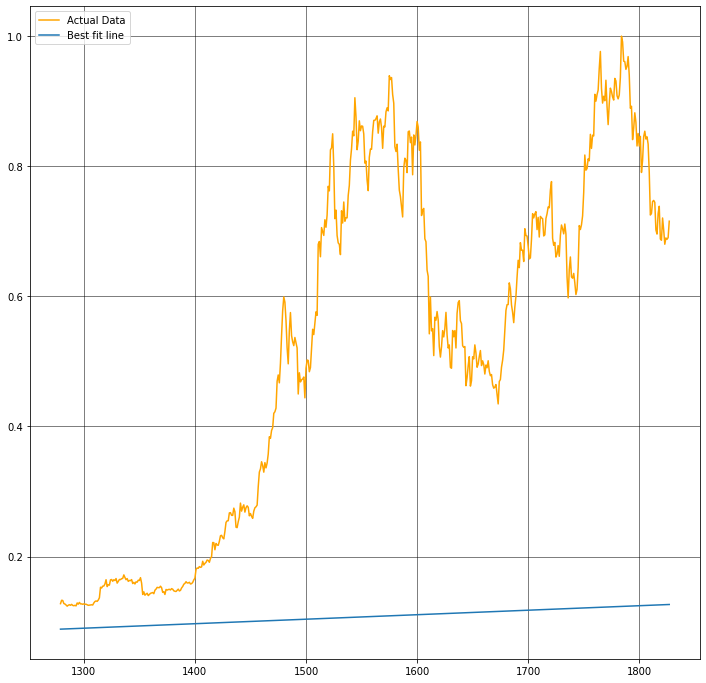

In [187]:
#### Plotting ####
plt.subplots(1, figsize=(12, 12))
plt.plot(X_test, y_test, '-', color='orange', label='Actual Data')
plt.plot(X_test, linReg.coef_ * X_test, label='Best fit line')
plt.grid(color='#000000', linestyle='-', linewidth=0.5)
plt.legend(loc="upper left")

In [188]:
####### Logistic Regression #######

In [189]:
scaled_data_log = scaled_data
scaled_data_log["Change"] = scaled_data.Close.gt(scaled_data.Close.shift())
scaled_data_log["Change"] = np.where(scaled_data_log["Change"] == False, 0, 1)
scaled_data_log

,Date,Close,Change
0,736319,0.000846,0
1,736320,0.001299,1
2,736321,0.002159,1
3,736322,0.001813,0
4,736323,0.001773,0
...,...,...,...
1822,738141,0.680117,0
1823,738142,0.689799,1
1824,738143,0.687676,0
1825,738144,0.690270,1


In [190]:
X = scaled_data_log[["Date","Close"]].values
y = scaled_data_log["Change"].values

In [191]:
X

array([[7.36319000e+05, 8.46305931e-04],
       [7.36320000e+05, 1.29935868e-03],
       [7.36321000e+05, 2.15943997e-03],
       ...,
       [7.38143000e+05, 6.87676260e-01],
       [7.38144000e+05, 6.90270422e-01],
       [7.38145000e+05, 7.15507581e-01]])

In [192]:
y

array([0, 1, 1, ..., 0, 1, 1])

In [193]:
X[:5]

array([[7.36319000e+05, 8.46305931e-04],
       [7.36320000e+05, 1.29935868e-03],
       [7.36321000e+05, 2.15943997e-03],
       [7.36322000e+05, 1.81264689e-03],
       [7.36323000e+05, 1.77313387e-03]])

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [195]:
y_train

array([1, 0, 0, ..., 1, 1, 1])

In [196]:
print( X_train.shape )
print( y_train.shape )
print( X_test.shape )
print( y_test.shape )

(1278, 2)
(1278,)
(549, 2)
(549,)


In [197]:
m, n = X.shape
mu = np.zeros( (X_train.shape[1], 1) )
stdu = np.zeros( (X_train.shape[1], 1) )
for j in range(1,n):
    mu[j] = X[:,j].mean()
    stdu[j] = X[:,j].std()

stdu[0] = 1#because otherwise it will divide by 0 later on standarization

In [198]:
mu

array([[0.        ],
       [0.21641378]])

In [199]:
stdu

array([[1.        ],
       [0.25205026]])

In [200]:
for j in range(1,n):
    X_train[:, j] = (X_train[:, j] - mu[j] ) / stdu[j]

In [201]:
for j in range(1,n):
    X_test[:, j] = (X_test[:, j] - mu[j] ) / stdu[j]

In [202]:
pd.DataFrame( X_train ).head()

,0,1
0,737789.0,0.808421
1,737437.0,-0.421026
2,737034.0,-0.695651
3,738092.0,2.791705
4,737013.0,-0.569305


In [203]:
pd.DataFrame( X_test ).head()

,0,1
0,736566.0,-0.645129
1,737612.0,-0.347884
2,737881.0,2.605646
3,737420.0,-0.471762
4,737480.0,-0.349890


In [204]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train.ravel() )

In [205]:
clf.score(X_train,y_train)

0.543035993740219

In [206]:
clf.score(X_test,y_test)

0.5500910746812386

In [209]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       247
           1       0.55      1.00      0.71       302

    accuracy                           0.55       549
   macro avg       0.28      0.50      0.35       549
weighted avg       0.30      0.55      0.39       549



C:\Users\Μαρίνα Σαμ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Μαρίνα Σαμ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Μαρίνα Σαμ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

<AxesSubplot:xlabel='Date', ylabel='Close'>

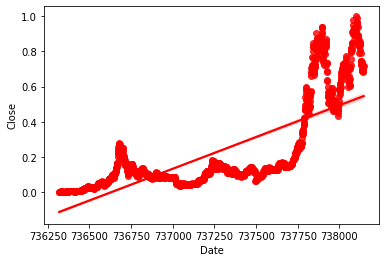

In [207]:
#### Plotting ####
sns.regplot(x='Date', y='Close', data=scaled_data_log,color="red")